In [1]:
import dateutil.relativedelta as relativedelta
import dateutil.rrule as rrule
import datetime

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
rs_card_data = pd.read_csv('../../data/bigcontest/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt', sep='\t')
fr_card_data = pd.read_csv('../../data/bigcontest/02_카드매출데이터(신한카드)/CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt', sep='\t', engine='python')

In [8]:
pr_card = rs_card_data.profile_report()

In [10]:
pr_card #.to_file('./rs_card.html')

In [11]:
rs_card_data.shape

(2537753, 8)

In [12]:
fr_card_data.shape

(238829, 7)

In [13]:
2537753/238829

10.625815960373322

In [14]:
rs_card_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


# mct_cat_cd 한글로 변환

In [62]:
mct_dict = { 10:'숙박', 20:'레저용품', 21:'레저업소', 22:'문화취미',
 30:'가구', 31:'전기', 32:'주방용구', 33:'연료판매',
 34:'광학제품', 35:'가전', 40:'유통업', 42:'의복',
 43:'직물', 44:'신변잡화', 50:'서적문구', 52:'사무통신',
 60:'자동차판매', 62:'자동차정비', 70:'의료기관', 71:'보건위생',
 80:'요식업소', 81:'음료식품', 92:'수리서비스' }

In [66]:
rs_card_data.MCT_CAT_CD = [mct_dict[cnt] for cnt in rs_card_data.MCT_CAT_CD]

# 시작

In [67]:
rs_card_data.STD_DD = pd.to_datetime(rs_card_data.STD_DD,format='%Y%m%d')

rs_card_data.SEX_CD = rs_card_data.SEX_CD.astype('category')

In [68]:
data19 = rs_card_data[rs_card_data.STD_DD.dt.year==2019]
data20 = rs_card_data[rs_card_data.STD_DD.dt.year==2020]

In [69]:
rs_card_data['year'] = rs_card_data.STD_DD.dt.year
rs_card_data['month'] = rs_card_data.STD_DD.dt.month
rs_card_data['day'] = rs_card_data.STD_DD.dt.day
rs_card_data['week'] = rs_card_data.STD_DD.dt.weekofyear 

In [70]:
table = rs_card_data.pivot_table(values=['USE_CNT', 'USE_AMT'],
                         columns='year',   index=['week', 'MCT_CAT_CD'],
                         aggfunc='sum')

In [71]:
table.columns

# 20년도 - 19년도 : 즉 증감수치

MultiIndex([('USE_AMT', 2019),
            ('USE_AMT', 2020),
            ('USE_CNT', 2019),
            ('USE_CNT', 2020)],
           names=[None, 'year'])

In [72]:
# 전체 이용금액 차이
total_diff = (table.iloc[:,1] - table.iloc[:,0])

# 건당 이용금액 차이
cnt_diff = (table.iloc[:,1] / table.iloc[:,3] - table.iloc[:,0] / table.iloc[:,2])

In [73]:
# x tics

year =2020
before =datetime.datetime(year,1,1)
after =datetime.datetime(year,12,31)
rr = rrule.rrule(rrule.WEEKLY,byweekday=relativedelta.SU,dtstart=before)

test = pd.DataFrame(rr.between(before,after,inc=True))  + datetime.timedelta(days=-13) # 월요일 기준

test2 = list(map(lambda x : str(pd.to_datetime(x[0]).month)+'/'+ str(pd.to_datetime(x[0]).day)
         , list(test.values)))

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 44032 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 44396 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51204 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 44305 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54617 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51228 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54408 missing from current font.

C:\Users\User\anaconda3\lib

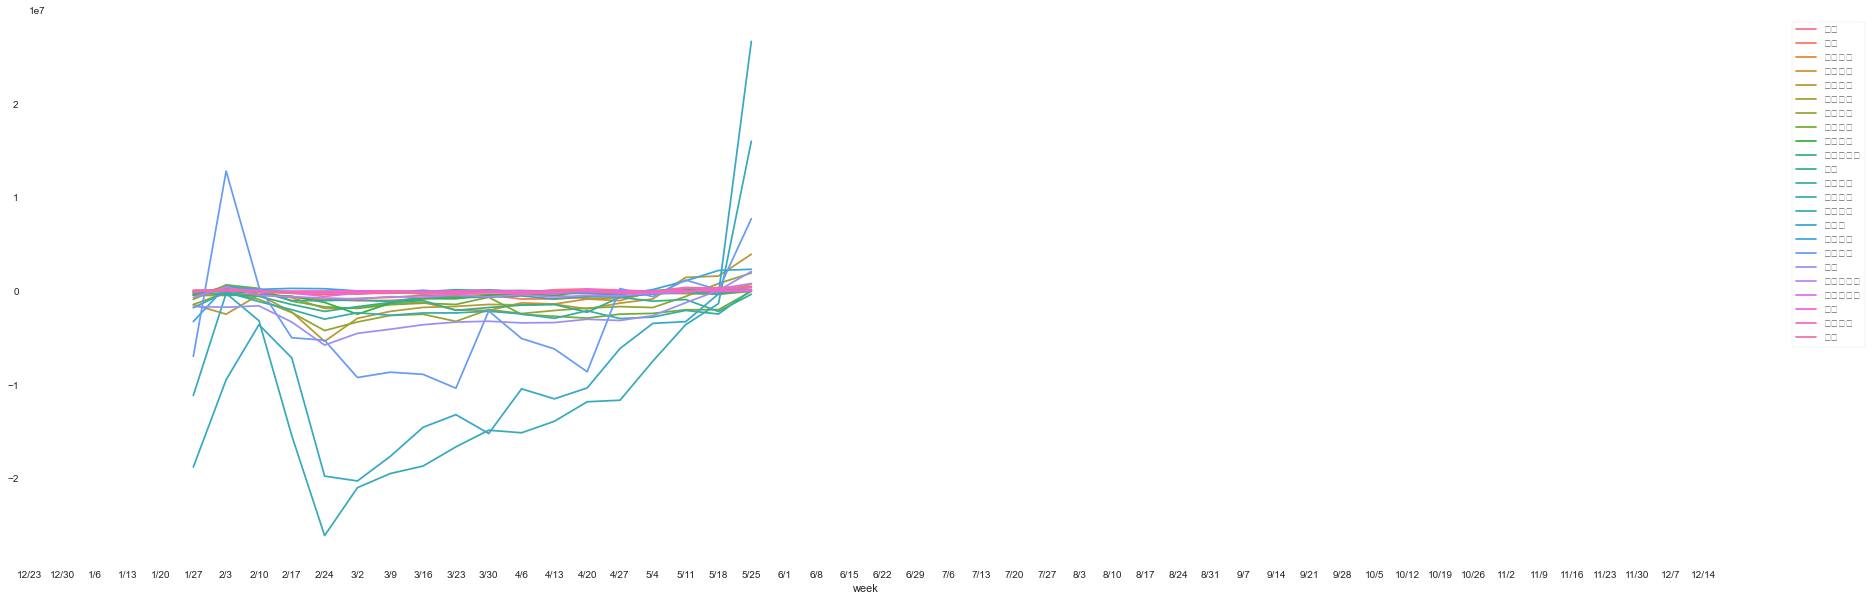

In [74]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=total_diff.unstack('MCT_CAT_CD'), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(ticks=(np.arange(0, len(test2))), labels=test2)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 44032 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 44396 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51204 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 44305 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54617 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51228 missing from current font.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54408 missing from current font.

C:\Users\User\anaconda3\lib

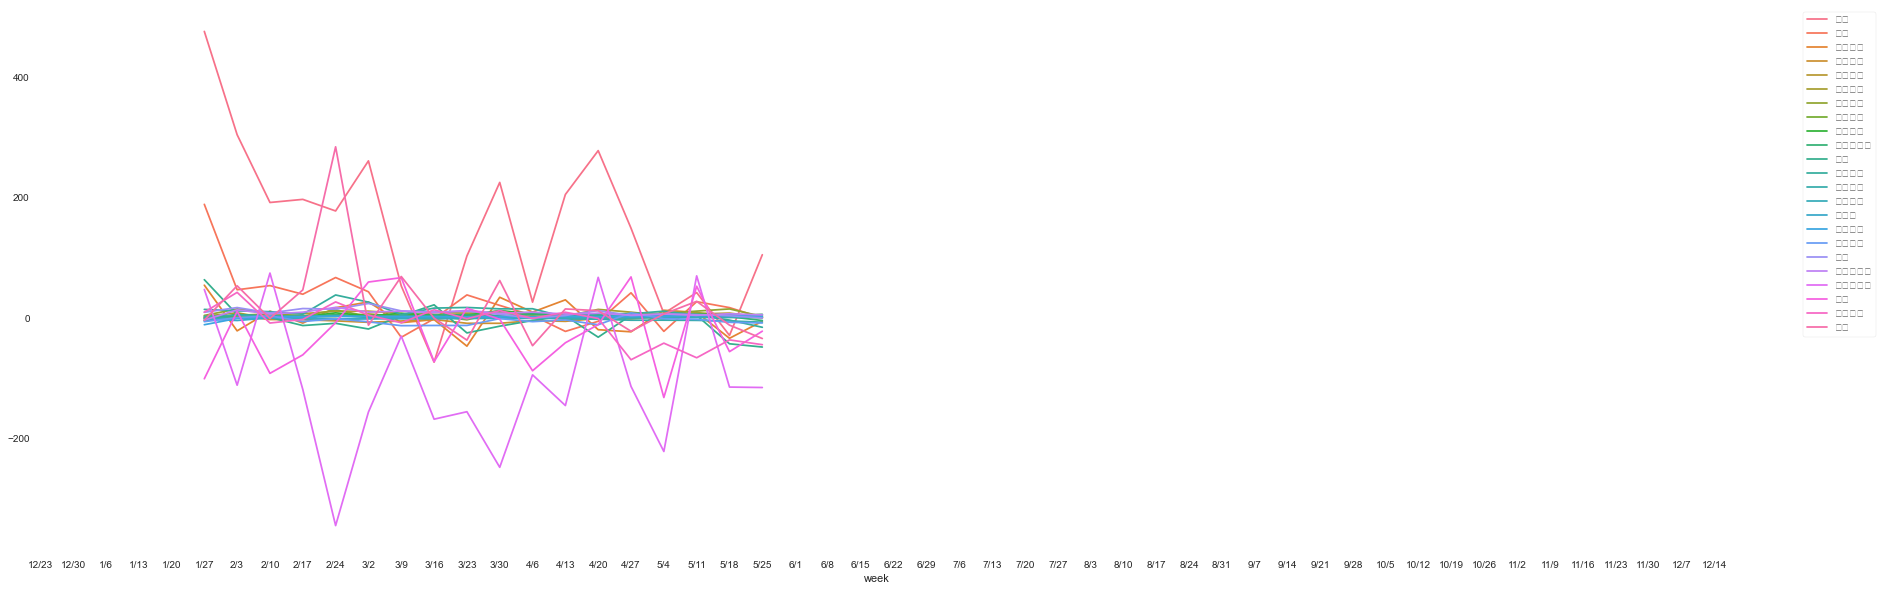

In [75]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=cnt_diff.unstack('MCT_CAT_CD'), dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(ticks=(np.arange(0, len(test2))), labels=test2)
plt.show()

In [76]:
total_diff2 = total_diff.reset_index()
cnt_diff2 = cnt_diff.reset_index()

total_diff2.columns = ['week', 'MCT_CAT_CD', 'diff']
cnt_diff2.columns = ['week', 'MCT_CAT_CD', 'diff']

In [77]:
fig = px.line(total_diff2, x="week", y="diff", color='MCT_CAT_CD')

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(0, len(test2)),
        ticktext = test2
    )
)
fig.show()

In [78]:
fig = px.line(cnt_diff2, x="week", y="diff", color='MCT_CAT_CD')

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(0, len(test2)),
        ticktext = test2
    )
)
fig.show()

In [79]:
rs_card_data[rs_card_data.week== max(rs_card_data.week-1)]
# 즉 5.18의 값은 아래를 의미

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day,week
1177416,2019-05-20,110,517,숙박,F,20,6,83,2019,5,20,21
1177417,2019-05-20,110,517,숙박,F,25,6,220,2019,5,20,21
1177418,2019-05-20,110,517,숙박,M,20,6,193,2019,5,20,21
1177419,2019-05-20,110,517,숙박,M,25,11,275,2019,5,20,21
1177420,2019-05-20,110,517,숙박,M,30,17,415,2019,5,20,21
...,...,...,...,...,...,...,...,...,...,...,...,...
2460554,2020-05-24,350,720,음료식품,M,40,33,312,2020,5,24,21
2460555,2020-05-24,350,720,음료식품,M,50,9,106,2020,5,24,21
2460556,2020-05-24,350,720,음료식품,M,55,5,26,2020,5,24,21
2460557,2020-05-24,350,720,음료식품,M,60,14,249,2020,5,24,21


# 서울 대구 분리

In [80]:
data_seoul = rs_card_data[rs_card_data.GU_CD.isin([140,350])]
data_daegu = rs_card_data[rs_card_data.GU_CD.isin([260,110])]

In [81]:
seoul_table = data_seoul.pivot_table(values=['USE_CNT', 'USE_AMT'],
                         columns='year',   index=['week', 'MCT_CAT_CD'],
                         aggfunc='sum')

daegu_table = data_daegu.pivot_table(values=['USE_CNT', 'USE_AMT'],
                         columns='year',   index=['week', 'MCT_CAT_CD'],
                         aggfunc='sum')

In [82]:
# 전체 이용금액 차이
seoul_total_diff = (seoul_table.iloc[:,1] - seoul_table.iloc[:,0])
daegu_total_diff = (daegu_table.iloc[:,1] - daegu_table.iloc[:,0])

# 건당 이용금액 차이
seoul_cnt_diff = (seoul_table.iloc[:,1] / seoul_table.iloc[:,3] - seoul_table.iloc[:,0] / seoul_table.iloc[:,2])
daegu_cnt_diff = (daegu_table.iloc[:,1] / daegu_table.iloc[:,3] - daegu_table.iloc[:,0] / daegu_table.iloc[:,2])

In [83]:
seoul_total_diff2 = seoul_total_diff.reset_index()
seoul_cnt_diff2 = seoul_cnt_diff.reset_index()

seoul_total_diff2.columns = ['week', 'MCT_CAT_CD', 'diff']
seoul_cnt_diff2.columns = ['week', 'MCT_CAT_CD', 'diff']


daegu_total_diff2 = daegu_total_diff.reset_index()
daegu_cnt_diff2 = daegu_cnt_diff.reset_index()

daegu_total_diff2.columns = ['week', 'MCT_CAT_CD', 'diff']
daegu_cnt_diff2.columns = ['week', 'MCT_CAT_CD', 'diff']

In [84]:
fig = px.line(seoul_total_diff2, x="week", y="diff", color='MCT_CAT_CD')

fig.update_layout(xaxis=dict(tickmode='array', tickvals=np.arange(0, len(test2)), ticktext=test2))
fig.show()

In [85]:
fig = px.line(daegu_total_diff2, x="week", y="diff", color='MCT_CAT_CD')

fig.update_layout(xaxis=dict(tickmode='array', tickvals=np.arange(0, len(test2)), ticktext=test2))
fig.show()

In [86]:
fig = px.line(seoul_cnt_diff2, x="week", y="diff", color='MCT_CAT_CD')

fig.update_layout(xaxis=dict(tickmode='array', tickvals=np.arange(0, len(test2)), ticktext=test2))
fig.show()

In [87]:
fig = px.line(daegu_cnt_diff2, x="week", y="diff", color='MCT_CAT_CD')

fig.update_layout(xaxis=dict(tickmode='array', tickvals=np.arange(0, len(test2)), ticktext=test2))
fig.show()

## 생각해볼 거리

업종 코드를 간소화 하거나 일부만 봐야 할듯 

평균을 사용할지 합산을 사용할지 생각해 봐야 할듯

주당으로 하나로 볼지 주중 주말로 따로 볼지 생각해보기

- 일별은 의미 없어보임, 주별로 하면 주중 주말 효과를 한번에 해결할 장점 있음, 주중 주말을 따로 보면 더 깊게 세부적으로 본다는 장점이 있음
